### Overview of RNN

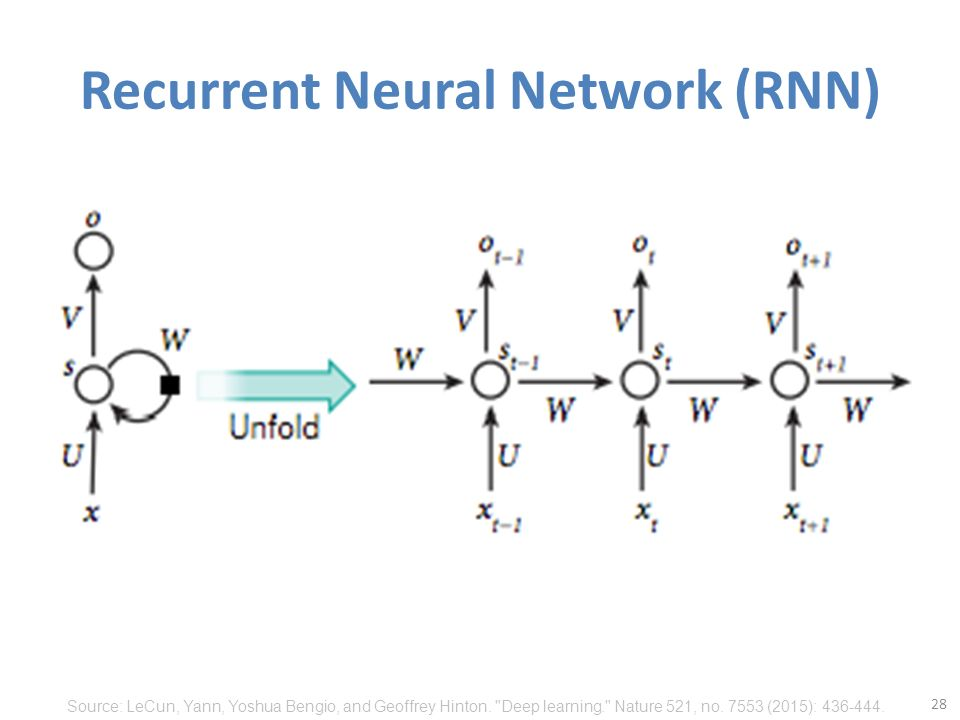

#####  RNN network steps
\begin{equation*}
\ a^t = b + Ws^{t-1} + Ux^t .........(1)\\
\ s^t = tanh(a^t)           .........(2)\\
 \ o^t = c + Vs^t           .........(3)\\
 \ p^t = softmax(o^t)       .........(4)
\end{equation*}

__the parameters are the bias vectors b and c along with the weight matrices U , V and W , respectively, for input-to-hidden, hidden-to output and hidden-to-hidden connections. This is an example of a recurrent network that maps an input sequence to an output sequence of the same length__

###### Derivation attempt
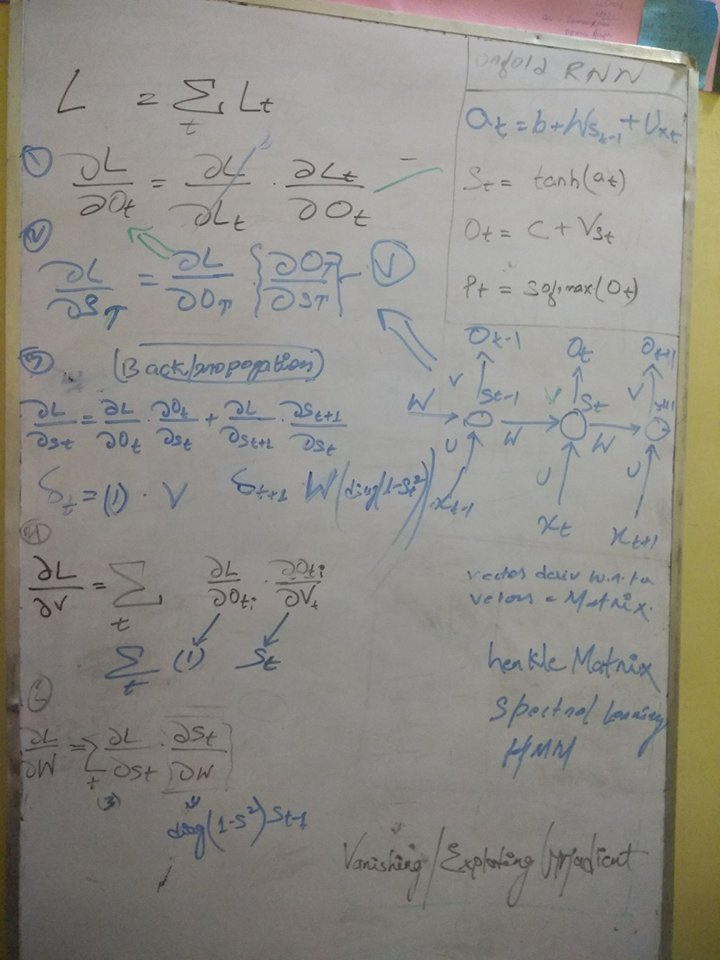

##### Four Effective ways to learn RNN

1)LSTM:They are designed to remember values for long time.

2)Hessian Free Optimization:

3)Echo State Network:

4)Good Intialization of Momentum: 

##### Long Short Term Memory Network ::
They are designed(a memory cell using logistic and linear units with multiplicative interactions)to remember values for long time(like hundred of time steps.).



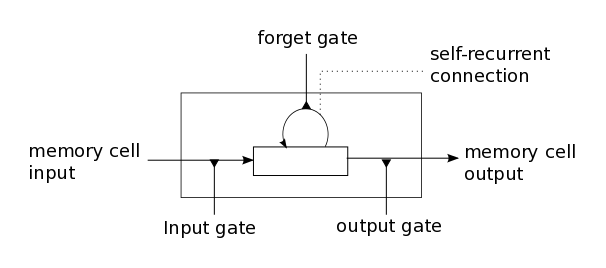
source:http://deeplearning.net

##### Brief understanding of Long Short Term Memory :: 

1)A memory cell or Information cell using logistic and linear units with multiplicative interactions.It is responsible for holding the data and the three logistic GATES(write,keep and read) define the flow of data inside the LSTM.


2)__WRITE GATE__ or __INPUT GATE__ is responsible for writing data into memory cell.
- Information gets into the cell whenever its "WRITE" gate is ON.
- Its recieve the same input and the state of the network__
- It also recieve the recurrent net's output data from the most     current time step.
- It uses the input to detemine how much of the output data should be written in memory cell.

3)__KEEP GATE__ or __FORGET GATE__ is maintains or delete data from memory cell.
- The Informaion stays in the cell so long as its "KEEP" gate is ON.
- Its recieve the same input and the state of the network and then calculates how much of the current data should be remember.

4)__READ GATE__ or __OUTPUT GATE__ reads data from information cell  and send back to recurrent network.
- Information can be read from the cell on its "READ" gate.
- It reads a value from information cell,and this value is interpreted as signal between -1 and 1.
- The input data and state of the network are then used to dtermine how much of this signal should be send to the recurrent network.

__NOTE__ Manupulating __GATES__,a recurrent network is able to remember what it __needs__ and __forget__ what is no longer useful.


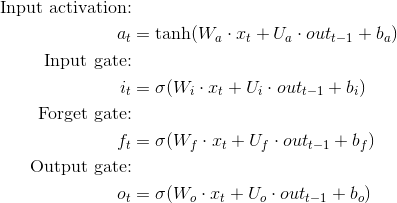
source:medium

#### LSTM network on Images.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [3]:
train_imgs = mnist.train.images
test_imgs = mnist.test.images
train_labels = mnist.train.labels
test_labels = mnist.test.labels

ntrain = train_imgs.shape[0]
ntest = test_imgs.shape[0]
dim = train_imgs.shape[1]
nclasses = train_labels.shape[1]

print "train_images", train_imgs.shape
print "train_labels", train_labels.shape
print
print "Test_images", test_imgs.shape
print "Test_labels", test_labels.shape


train_images (55000, 784)
train_labels (55000, 10)

Test_images (10000, 784)
Test_labels (10000, 10)


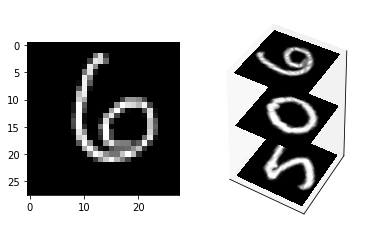

Sample: 100 - Class: [6] - Label Vector: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 
Sample: 101 - Class: [0] - Label Vector: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
Sample: 102 - Class: [5] - Label Vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 


In [4]:
samplesIdx = [100, 101, 102] 

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.imshow(test_imgs[samplesIdx[0]].reshape([28,28]), cmap='gray')


xx, yy = np.meshgrid(np.linspace(0,28,28), np.linspace(0,28,28))
X =  xx ; Y =  yy
Z =  100*np.ones(X.shape)

img = test_imgs[77].reshape([28,28])
ax = fig.add_subplot(122, projection='3d')
ax.set_zlim((0,200))


offset=200
for i in samplesIdx:
    img = test_imgs[i].reshape([28,28]).transpose()
    ax.contourf(X, Y, img, 200, zdir='z', offset=offset, cmap="gray")
    offset -= 100

    ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()


for i in samplesIdx:
    print "Sample: {0} - Class: {1} - Label Vector: {2} ".format(i, np.nonzero(test_labels[i])[0], test_labels[i])



MNIST image $\in \mathcal{R}^{28 \times 28}$ as $28$ sequences of a vector $\mathbf{x} \in \mathcal{R}^{28}$. 

#### Our simple RNN consists of  
1. One input layer which converts a $28*28$ dimensional input to an $128$ dimensional hidden layer, 
2. One intermediate recurrent neural network (LSTM) 
3. One output layer which converts an $128$ dimensional output of the LSTM to $10$ dimensional output indicating a class label. 

In [5]:
n_input = 28
n_steps = 28
n_hidden = 128
n_classes = 10

learning_rate = 0.001
training_iters = 100000
batch_size = 100
display_steps = 10

In [6]:
x = tf.placeholder(dtype='float',shape=[None,n_steps,n_input],name="x")
y = tf.placeholder(dtype="float", shape=[None,n_classes], name="y")

In [7]:
weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [8]:
lstm_cell = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)

In [9]:
outputs, states = tf.nn.dynamic_rnn(lstm_cell, inputs=x, dtype=tf.float32)


In [10]:
output = tf.reshape(tf.split(outputs, 28, axis=1, num=None, name='split')[-1],[-1,128])
pred = tf.matmul(output, weights['out']) + biases['out']

In [11]:
pred

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [12]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred ))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [13]:
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [14]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:

      
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        batch_x = batch_x.reshape((batch_size, n_steps, n_input))
    

        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        
        
        if step % display_steps == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y: test_label}))

Iter 1000, Minibatch Loss= 1.719207, Training Accuracy= 0.44000
Iter 2000, Minibatch Loss= 1.280327, Training Accuracy= 0.56000
Iter 3000, Minibatch Loss= 1.067423, Training Accuracy= 0.67000
Iter 4000, Minibatch Loss= 1.094688, Training Accuracy= 0.65000
Iter 5000, Minibatch Loss= 1.002710, Training Accuracy= 0.68000
Iter 6000, Minibatch Loss= 0.714375, Training Accuracy= 0.76000
Iter 7000, Minibatch Loss= 0.666970, Training Accuracy= 0.77000
Iter 8000, Minibatch Loss= 0.579452, Training Accuracy= 0.84000
Iter 9000, Minibatch Loss= 0.584984, Training Accuracy= 0.77000
Iter 10000, Minibatch Loss= 0.691396, Training Accuracy= 0.78000
Iter 11000, Minibatch Loss= 0.511800, Training Accuracy= 0.82000
Iter 12000, Minibatch Loss= 0.417961, Training Accuracy= 0.90000
Iter 13000, Minibatch Loss= 0.336841, Training Accuracy= 0.90000
Iter 14000, Minibatch Loss= 0.380818, Training Accuracy= 0.88000
Iter 15000, Minibatch Loss= 0.341305, Training Accuracy= 0.87000
Iter 16000, Minibatch Loss= 0.3463

In [15]:
sess.close()